### To predict insurance costs by using Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

### Read the data from csv file

In [3]:
data = pd.read_csv("../insurance.csv")

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Here target is the charges

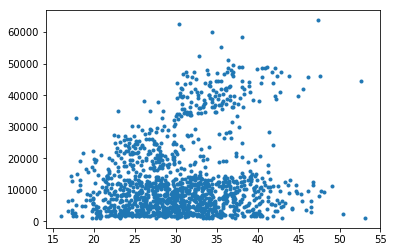

In [4]:
plt.plot(data['bmi'],data['charges'],'.')

### When 'bmi' is visuallized wrt to the 'charges' ,As BMI go up Charges for health insurance also trends up.Hence,this feature is considered

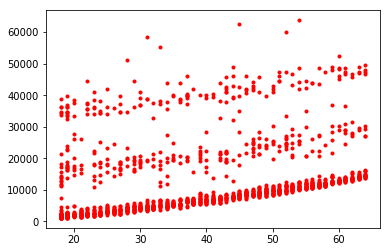

In [5]:
plt.plot(data['age'],data['charges'],'r.')

### By visualizing, the old ppl have more medical cost than the younger ones.Hence,this feature is considered.

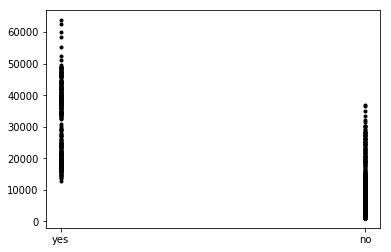

In [6]:
plt.plot(data['smoker'],data['charges'],'k.')

### By visualizing, smoker has more charges than non-smoker.Hence,this feature is considered.

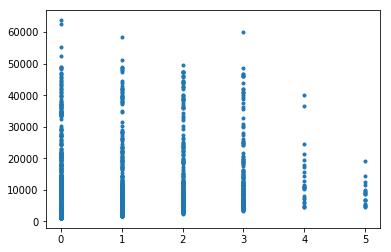

In [7]:
plt.plot(data['children'],data['charges'],'.')

### For 4 & 5 children, the cost decreases,it doesnt make any sense wrt to the domain knowledge,hence this feature is not considered.

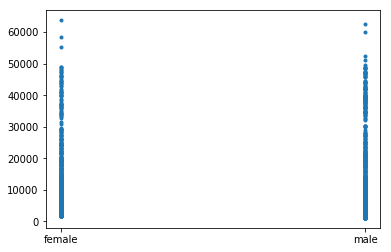

In [8]:
plt.plot(data['sex'],data['charges'],'.')

### The charges for male & female is same, hence this feature is not considered.

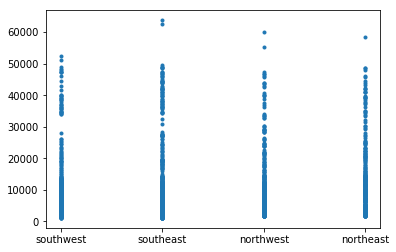

In [9]:
plt.plot(data['region'],data['charges'],'.')

### All the regions have same charges,hence this feature is not considered

### To convert columns which have str to int, LabelEncoder is used

In [10]:
le=preprocessing.LabelEncoder() 

In [47]:
le.fit(data['smoker'])
data['smoker']=le.transform(data['smoker'])

In [12]:
le.fit(data['sex'])
data['sex']=le.transform(data['sex'])

In [13]:
le.fit(data['region'])
data['region']=le.transform(data['region'])

All the columns with str values are converted to int

In [14]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


### Normalizing the data

In [15]:
data=(data-data.min())/(data.max()-data.min())

### Using 3 features--> bmi,age,smoker as numpy array

In [16]:
x1= np.array(data['bmi'])
x2=np.array(data['age'])
x3=np.array(data['smoker'])

y= np.array(data['charges'])

### Spliting the data as train and test

In [17]:
x1train,x1test,x2train,x2test,x3train,x3test,ytrain,ytest= train_test_split(x1,x2,x3,y,test_size=0.2)

### Defining the equation for our model

In [18]:
def hypothesis(a,x1,b,x2,c,x3,d):
    return a * x1 +b * x2 + c * x3 + d   #returns hypothesis eq for our model

### Defining the loss function or error equation for our model

In [19]:
def error(a,x1,b,x2,c,x3,d,y):
    err=0     #holds the error value
    m=len(x1) #how many data_pts are present is stored
    
    for i in range(m):
        err += np.power((hypothesis(a,x1[i],b,x2[i],c,x3[i],d)-y[i]),2)
        #err=summation(h-y)2
        
    return (1/(2*m)) *err #loss fn

### Defining step-gradient in order to reach the minima

In [20]:
def step_gradient(a,x1,b,x2,c,x3,d,y,learning_rate):
    grad_a=0
    grad_b=0
    grad_c=0
    grad_d=0
    
    m= len(x1)
    
    for i in range(m):
        grad_a += (1/m) * (hypothesis(a,x1[i],b,x2[i],c,x3[i],d)-y[i])*x1[i] #differentaition wrt a
        grad_b += (1/m) * (hypothesis(a,x1[i],b,x2[i],c,x3[i],d)-y[i])*x2[i] #diff wrt b
        grad_c += (1/m) * (hypothesis(a,x1[i],b,x2[i],c,x3[i],d)-y[i])*x3[i] #diffwrt c
        grad_d += (1/m) * (hypothesis(a,x1[i],b,x2[i],c,x3[i],d)-y[i])       #diff wrt d
    
    
    a=a-grad_a*learning_rate
    b=b-grad_b*learning_rate
    c=c-grad_c*learning_rate
    d=d-grad_d*learning_rate

    return a,b,c,d

In [21]:
def descend(init_a,x1,init_b,x2,init_c,x3,init_d,y,learning_rate,iteration):
    a=init_a
    b=init_b
    c=init_c
    d=init_d

    
    for i in range(iterations): #iterations--> hw many times we step
        err=error(a,x1,b,x2,c,x3,d,y)
        
        if i% 1000 == 0:
            print(f"Error: {np.sqrt(err)}, a: {a}, b:{b}, c:{c},d:{d}")
            #print error at every 1000 step
            #sqrt of mean error
            
        a,b,c,d =step_gradient(a,x1,b,x2,c,x3,d,y,learning_rate)
        
    return a,b,c,d

In [40]:
a=0.06539044421861319
b=0.11517579858061223
c=0.28935720979743573
d=0.061520900131617616
learning_rate = 0.001
iterations = 10000

In [41]:
final_a, final_b,final_c,final_d = descend(a,x1train,b,x2train,c,x3train,d,ytrain,learning_rate,iterations)

Error: 0.07560420676493175, a: 0.06539044421861319, b:0.11517579858061223, c:0.28935720979743573,d:0.061520900131617616
Error: 0.07422859662836233, a: 0.06715374002341701, b:0.11971505521317251, c:0.3015656976641718,d:0.05577172934645373
Error: 0.07313761332858842, a: 0.06900612929084653, b:0.12408102329071405, c:0.3120490343344764,d:0.05046504690089971
Error: 0.07226715277665156, a: 0.07093076129566513, b:0.128262982297476, c:0.3210557766491568,d:0.045556710436115255
Error: 0.07156758319358952, a: 0.07291300408108356, b:0.13225438340504567, c:0.32879830658632453,d:0.041007653540824
Error: 0.07100069169736856, a: 0.07494017494144699, b:0.13605208023787765, c:0.33545813477772146,d:0.03678330357967118
Error: 0.07053715652354725, a: 0.0770012860826844, b:0.13965565912610553, c:0.3411904145068898,d:0.03285302338988531
Error: 0.07015451135120726, a: 0.07908682029336368, b:0.14306687418783878, c:0.3461277915474079,d:0.029189615830391265
Error: 0.06983553925211754, a: 0.08118853638871833, b:0

In [42]:
final_a,final_b,final_c,final_d

(0.08541294425713439,
 0.15218704206017183,
 0.3572250466283135,
 0.019571592626678114)

3 test values of target

In [43]:
ytest[:3]

array([0.55988244, 0.05163997, 0.3385504 ])

Comparing the test values with the obtained values 

In [44]:
hypothesis(final_a,x1test[:3],final_b,x2test[:3],final_c,x3test[:3],final_d)

array([0.45556247, 0.09754296, 0.47752421])

In [45]:
np.sqrt(error(final_a,x1train,final_b,x2train,final_c,x3train,final_d,ytrain))

0.06933879412319799

###  Root Mean Squared Error for train dataset is: 0.069

In [46]:
np.sqrt(error(final_a,x1test,final_b,x2test,final_c,x3test,final_d,ytest))

0.07598210190315803

### Root Mean Squared Error for test dataset is: 0.075